In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
import constrainedzoom as cz
import constrainedzoom.plots as cp
import functools
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

# Creating Density Field

In [3]:
HIGH = 256//2
LOW = 256//2
SCALE = 2
OFFSET = 10
test = cz.methods.filtered.FilteredZoomConstrained(nP=HIGH, nW=LOW, hires_window_scale=SCALE, offset=OFFSET)

In [4]:
low, high = test.realization()
high_pixel = np.arange(SCALE*OFFSET, LOW+OFFSET*SCALE)
low_pixel = np.arange(0, SCALE*HIGH, SCALE)

Text(0, 0.5, 'overdensity')

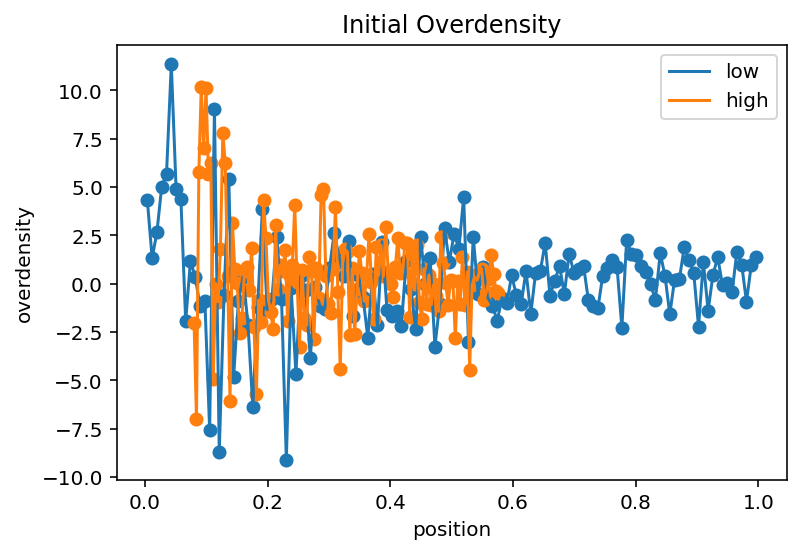

In [19]:
pos = test.xs()
plt.plot(pos[0], low, label='low')
plt.plot(pos[1], high, label='high')
plt.scatter(pos[0], low)
plt.scatter(pos[1], high)
plt.legend()
plt.title("Initial Overdensity")
plt.xlabel("position")
plt.ylabel("overdensity")

In [7]:
# plotting as a single field (the low-res parts are ignored in zoomed window)
low_pixelmasked = np.ma.masked_inside(low_pixel, SCALE*OFFSET, LOW+OFFSET*SCALE)
lowmasked = np.ma.fix_invalid(low, mask=low_pixelmasked.mask)

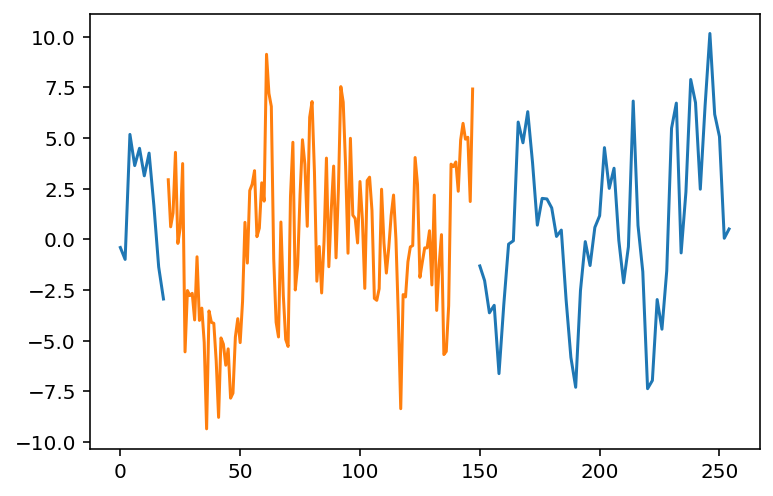

In [9]:
#TODO: make it into one array
plt.plot(low_pixelmasked, lowmasked, label = 'low')
plt.plot(high_pixel, high, label='high')

# Plotting Power Spectrum

/home/cosinga/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/cosinga/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


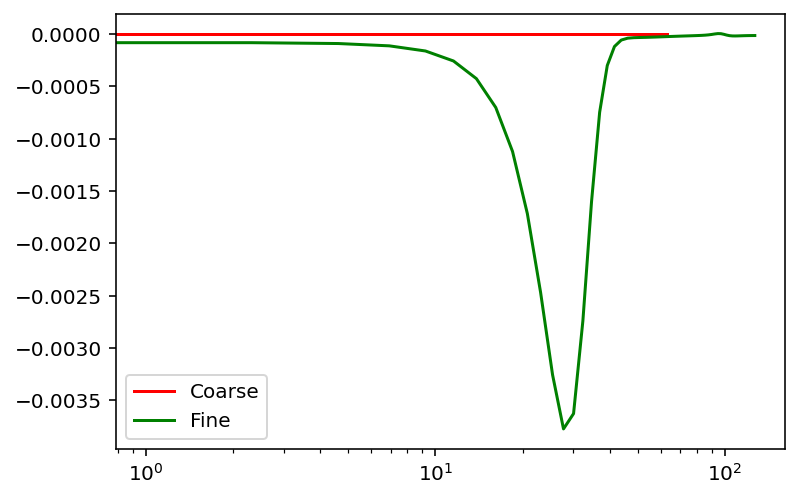

In [38]:
cov = test.get_cov()
cp.cov_zoom_demo(nP=HIGH, nW=LOW, hires_window_scale=SCALE, hires_window_offset=OFFSET,plaw=0,
                 errors=True,plot_type='pspec')

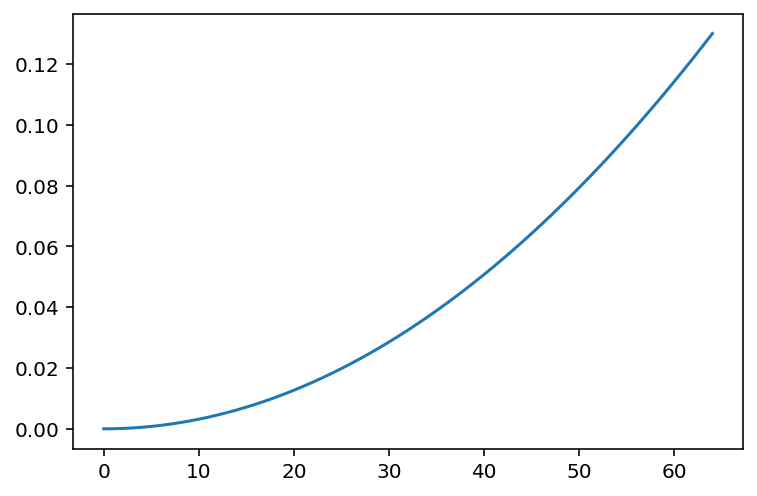

In [40]:
#plotting power spectrum for the low-res example
khi, klow=test._get_ks()
lowfs = low.in_fourier_space()
# plt.plot(klow, lowfs)
mycov = 1/(len(klow)-1)*np.outer(klow, klow)
power = mycov.diagonal()*(2*np.pi)**(-3)
plt.plot(klow,power)
# plt.yscale('log')
# plt.xscale('log')

In [30]:
ex=np.zeros(10)
res = cz.fft_wrapper.FFTArray(ex)